# Librerie utilizzate

In [1]:
from matplotlib import pyplot as plt
import matplotlib.dates as md
import numpy as np
from osgeo import gdal
from datetime import datetime, timedelta
import time
import os
from sentinelhub import SHConfig
from sentinelhub import MimeType, CRS, BBox, SentinelHubRequest, SentinelHubDownloadClient, DataCollection, bbox_to_dimensions, DownloadRequest

# Definiamo la configurazione per la connessione a sentinel Hub

In [4]:
config = SHConfig()

config.sh_client_id = 'sentinel id'
config.sh_client_secret = 'password'
config.save()

# Test su datetime

In [5]:
date = datetime(2004,1,1)
for i in range(0,365):
    dateNew = date+timedelta(days=i)
    print(dateNew.strftime("%Y-%m-%d"))

2004-01-01
2004-01-02
2004-01-03
2004-01-04
2004-01-05
2004-01-06
2004-01-07
2004-01-08
2004-01-09
2004-01-10
2004-01-11
2004-01-12
2004-01-13
2004-01-14
2004-01-15
2004-01-16
2004-01-17
2004-01-18
2004-01-19
2004-01-20
2004-01-21
2004-01-22
2004-01-23
2004-01-24
2004-01-25
2004-01-26
2004-01-27
2004-01-28
2004-01-29
2004-01-30
2004-01-31
2004-02-01
2004-02-02
2004-02-03
2004-02-04
2004-02-05
2004-02-06
2004-02-07
2004-02-08
2004-02-09
2004-02-10
2004-02-11
2004-02-12
2004-02-13
2004-02-14
2004-02-15
2004-02-16
2004-02-17
2004-02-18
2004-02-19
2004-02-20
2004-02-21
2004-02-22
2004-02-23
2004-02-24
2004-02-25
2004-02-26
2004-02-27
2004-02-28
2004-02-29
2004-03-01
2004-03-02
2004-03-03
2004-03-04
2004-03-05
2004-03-06
2004-03-07
2004-03-08
2004-03-09
2004-03-10
2004-03-11
2004-03-12
2004-03-13
2004-03-14
2004-03-15
2004-03-16
2004-03-17
2004-03-18
2004-03-19
2004-03-20
2004-03-21
2004-03-22
2004-03-23
2004-03-24
2004-03-25
2004-03-26
2004-03-27
2004-03-28
2004-03-29
2004-03-30
2004-03-31

# Prepariamo la query per il satellite

In [6]:
evalscript = """
    //VERSION=3
function setup() {
  return {
    input: [{
      bands: ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"],
      units: "DN"
    }],
    output: {
      id: "default",
      bands: 12,
      sampleType: SampleType.UINT16
    }
  }
}
function evaluatePixel(sample) {
    return [ sample.B01, sample.B02, sample.B03, sample.B04, sample.B05, sample.B06, sample.B07, sample.B08, sample.B8A, sample.B09, sample.B11, sample.B12]
}
"""
filelist = ['2017-01-01', '2017-01-14', '2017-01-24', '2017-01-31', '2017-01-04', '2017-02-10', '2017-02-13', '2017-02-20', '2017-02-23', '2017-02-03', '2017-03-12', '2017-03-15', '2017-03-02', '2017-03-22', '2017-03-25', '2017-03-25', '2017-03-05', '2017-04-01', '2017-04-11', '2017-04-11', '2017-04-14', '2017-04-21', '2017-04-24', '2017-04-04', '2017-05-01', '2017-05-11', '2017-05-14', '2017-05-21', '2017-05-24', '2017-05-31', '2017-05-04', '2017-06-10', '2017-06-13', '2017-06-20', '2017-06-23', '2017-06-03', '2017-06-30', '2017-07-10', '2017-07-13', '2017-07-15', '2017-07-18', '2017-07-20', '2017-07-23', '2017-07-25', '2017-07-28', '2017-07-03', '2017-07-30', '2017-07-08','2018-11-12', '2018-11-15', '2018-11-22', '2018-11-25', '2018-11-05', '2018-12-12', '2018-12-15', '2018-12-02', '2018-12-22', '2018-12-25', '2018-12-05']

request_raw_list_dict = []

for i in range(len(filelist)):
  start = filelist[i]+"T00:00:00Z"
  stop = filelist[i]+"T23:59:59Z"
  request_raw_dict = {
      "input": {
          "bounds": {
              "properties": {
                  "crs": "http://www.opengis.net/def/crs/EPSG/0/32633"
              },
              "geometry": {
                  "type": "Polygon",
                  "coordinates": 
          [ [ [ 275313.225371220265515, 4930657.958802883513272 ], [ 275388.914355162938591, 4932845.371425414457917 ], [ 278329.683593424211722, 4932744.26427542604506 ], [ 278254.987197705253493, 4930556.852888375520706 ], [ 275313.225371220265515, 4930657.958802883513272 ] ] ]
              }
          },
          "data": [
              {
                  "type": "S2L2A",
                  "dataFilter": {
                      "timeRange": {
                          "from": start,
                          "to": stop
                      }
                  },"processing": {
            "upsampling": "NEAREST",
            "downsampling": "NEAREST"
            }
              }
          ]
      },
      "output": {
          "resx": 10,
          "resy": 10,
          "responses": [
              {
                  "identifier": "default",
                  "format": {
                      'type': "image/tiff"
                  }
              }
          ]
      },
      "evalscript": evalscript
  }
  request_raw_list_dict.append(request_raw_dict)

# Test per arricchire il dataset

In [22]:
evalscript = """
    //VERSION=3
function setup() {
  return {
    input: [{
      bands: ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"],
      units: "DN"
    }],
    output: {
      id: "default",
      bands: 12,
      sampleType: SampleType.UINT16
    }
  }
}
function evaluatePixel(sample) {
    return [ sample.B01, sample.B02, sample.B03, sample.B04, sample.B05, sample.B06, sample.B07, sample.B08, sample.B8A, sample.B09, sample.B11, sample.B12]
}
"""
date = datetime(2018,1,1)
filelist = []
for i in range(0,365):
    dateNew = date+timedelta(days=i)
    print(dateNew.strftime("%Y-%m-%d"))
    filelist.append(dateNew.strftime("%Y-%m-%d"))


request_raw_list_dict = []
for i in range(len(filelist)):
  start = filelist[i]+"T00:00:00Z"
  stop = filelist[i]+"T23:59:59Z"
  request_raw_dict = {
      "input": {
          "bounds": {
              "properties": {
                  "crs": "http://www.opengis.net/def/crs/EPSG/0/32633"
              },
              "geometry": {
                  "type": "Polygon",
                  "coordinates": 
          [ [ [ 275313.225371220265515, 4930657.958802883513272 ], [ 275388.914355162938591, 4932845.371425414457917 ], [ 278329.683593424211722, 4932744.26427542604506 ], [ 278254.987197705253493, 4930556.852888375520706 ], [ 275313.225371220265515, 4930657.958802883513272 ] ] ]
              }
          },
          "data": [
              {
                  "type": "S2L2A",
                  "dataFilter": {
                      "timeRange": {
                          "from": start,
                          "to": stop
                      }
                  },"processing": {
            "upsampling": "NEAREST",
            "downsampling": "NEAREST"
            }
              }
          ]
      },
      "output": {
          "resx": 10,
          "resy": 10,
          "responses": [
              {
                  "identifier": "default",
                  "format": {
                      'type': "image/tiff"
                  }
              }
          ]
      },
      "evalscript": evalscript
  }
  request_raw_list_dict.append(request_raw_dict)

2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
2018-01-07
2018-01-08
2018-01-09
2018-01-10
2018-01-11
2018-01-12
2018-01-13
2018-01-14
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19
2018-01-20
2018-01-21
2018-01-22
2018-01-23
2018-01-24
2018-01-25
2018-01-26
2018-01-27
2018-01-28
2018-01-29
2018-01-30
2018-01-31
2018-02-01
2018-02-02
2018-02-03
2018-02-04
2018-02-05
2018-02-06
2018-02-07
2018-02-08
2018-02-09
2018-02-10
2018-02-11
2018-02-12
2018-02-13
2018-02-14
2018-02-15
2018-02-16
2018-02-17
2018-02-18
2018-02-19
2018-02-20
2018-02-21
2018-02-22
2018-02-23
2018-02-24
2018-02-25
2018-02-26
2018-02-27
2018-02-28
2018-03-01
2018-03-02
2018-03-03
2018-03-04
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-10
2018-03-11
2018-03-12
2018-03-13
2018-03-14
2018-03-15
2018-03-16
2018-03-17
2018-03-18
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-24
2018-03-25
2018-03-26
2018-03-27
2018-03-28
2018-03-29
2018-03-30
2018-03-31
2018-04-01

# Codice per la richiesta arricchita

2017-01-01.tiff
2017-01-14.tiff
2017-01-24.tiff
2017-01-31.tiff
2017-01-04.tiff
2017-02-10.tiff
2017-02-13.tiff
2017-02-20.tiff
2017-02-23.tiff
2017-02-03.tiff
2017-03-12.tiff
2017-03-15.tiff
2017-03-02.tiff
2017-03-22.tiff
2017-03-25.tiff
2017-03-25.tiff
2017-03-05.tiff
2017-04-01.tiff
2017-04-11.tiff
2017-04-11.tiff
2017-04-14.tiff
2017-04-21.tiff
2017-04-24.tiff
2017-04-04.tiff
2017-05-01.tiff
2017-05-11.tiff
2017-05-14.tiff
2017-05-21.tiff
2017-05-24.tiff
2017-05-31.tiff
2017-05-04.tiff
2017-06-10.tiff
2017-06-13.tiff
2017-06-20.tiff
2017-06-23.tiff
2017-06-03.tiff
2017-06-30.tiff
2017-07-10.tiff
2017-07-13.tiff
2017-07-15.tiff
2017-07-18.tiff
2017-07-20.tiff
2017-07-23.tiff
2017-07-25.tiff
2017-07-28.tiff
2017-07-03.tiff
2017-07-30.tiff
2017-07-08.tiff
2018-11-12.tiff
2018-11-15.tiff
2018-11-22.tiff
2018-11-25.tiff
2018-11-05.tiff
2018-12-12.tiff
2018-12-15.tiff
2018-12-02.tiff
2018-12-22.tiff
2018-12-25.tiff
2018-12-05.tiff


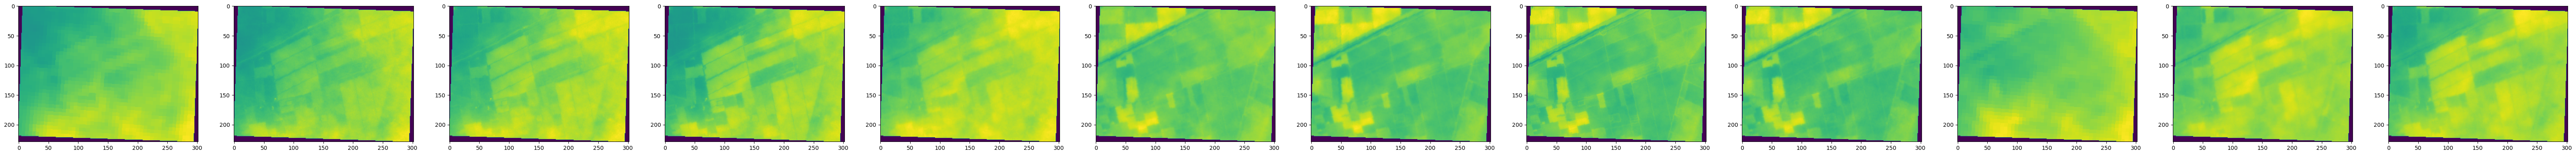

In [19]:
for i in range(0,len(request_raw_list_dict)):
  print(filelist[i] + ".tiff")
  '''download_request = DownloadRequest(
      request_type='POST',
      url="https://services.sentinel-hub.com/api/v1/process",
      post_values=request_raw_list_dict[i],
      data_type=MimeType.TIFF,
      headers={'content-type': 'application/json'},
      use_session=True,
      save_response = True,
      data_folder = "./content/data",
      filename = filelist[i] + ".tiff"
  )  
  # execute request
  #print(img[100:102,100:102,0])
  client = SentinelHubDownloadClient(config=config)
  img = client.download(download_request)
  print(os.path.getsize("./content/data/" + filelist[i] + ".tiff"))'''
  if(os.path.exists("./content/data/" + filelist[i] + ".tiff") and os.path.getsize("./content/data/" + filelist[i] + ".tiff") <= 2935):
    os.remove("./content/data/" + filelist[i] + ".tiff")
  #time.sleep(1)

tiff_file = r"content\data\2018-04-04.tiff"
dataset = gdal.Open(tiff_file)
band1 = dataset.GetRasterBand(1).ReadAsArray()
band2 = dataset.GetRasterBand(2).ReadAsArray()
band3 = dataset.GetRasterBand(3).ReadAsArray()
band4 = dataset.GetRasterBand(4).ReadAsArray()
band5 = dataset.GetRasterBand(5).ReadAsArray()
band6 = dataset.GetRasterBand(6).ReadAsArray()
band7 = dataset.GetRasterBand(7).ReadAsArray()
band8 = dataset.GetRasterBand(8).ReadAsArray()
band9 = dataset.GetRasterBand(9).ReadAsArray()
band10 = dataset.GetRasterBand(10).ReadAsArray()
band11 = dataset.GetRasterBand(11).ReadAsArray()
band12 = dataset.GetRasterBand(12).ReadAsArray()



#plt.figure()

f, axarr = plt.subplots(1,12) 
axarr[0].imshow(band1)
axarr[1].imshow(band2)
axarr[2].imshow(band3)
axarr[3].imshow(band4)
axarr[4].imshow(band5)
axarr[5].imshow(band6)
axarr[6].imshow(band7)
axarr[7].imshow(band8)
axarr[8].imshow(band9)
axarr[9].imshow(band10)
axarr[10].imshow(band11)
axarr[11].imshow(band12)
plt.subplots_adjust(left=40, right=50)
plt.show()

# Qui eseguiamo la richiesta al server, il risultato viene salvato in locale e stampiamo le diverse bande

2017-01-01.tiff
2017-01-14.tiff
2017-01-24.tiff
2017-01-31.tiff
2017-01-04.tiff
2017-02-10.tiff
2017-02-13.tiff
2017-02-20.tiff
2017-02-23.tiff
2017-02-03.tiff
2017-03-12.tiff
2017-03-15.tiff
2017-03-02.tiff
2017-03-22.tiff
2017-03-25.tiff
2017-03-25.tiff
2017-03-05.tiff
2017-04-01.tiff
2017-04-11.tiff
2017-04-11.tiff
2017-04-14.tiff
2017-04-21.tiff
2017-04-24.tiff
2017-04-04.tiff
2017-05-01.tiff
2017-05-11.tiff
2017-05-14.tiff
2017-05-21.tiff
2017-05-24.tiff
2017-05-31.tiff
2017-05-04.tiff
2017-06-10.tiff
2017-06-13.tiff
2017-06-20.tiff
2017-06-23.tiff
2017-06-03.tiff
2017-06-30.tiff
2017-07-10.tiff
2017-07-13.tiff
2017-07-15.tiff
2017-07-18.tiff
2017-07-20.tiff
2017-07-23.tiff
2017-07-25.tiff
2017-07-28.tiff
2017-07-03.tiff
2017-07-30.tiff
2017-07-08.tiff
2018-11-12.tiff
2018-11-15.tiff
2018-11-22.tiff
2018-11-25.tiff
2018-11-05.tiff
2018-12-12.tiff
2018-12-15.tiff
2018-12-02.tiff
2018-12-22.tiff
2018-12-25.tiff
2018-12-05.tiff


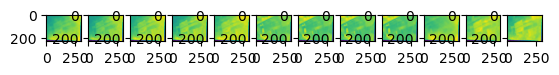

In [11]:
for i in range(0,len(request_raw_list_dict)):
  print(filelist[i] + ".tiff")
  download_request = DownloadRequest(
      request_type='POST',
      url="https://services.sentinel-hub.com/api/v1/process",
      post_values=request_raw_list_dict[i],
      data_type=MimeType.TIFF,
      headers={'content-type': 'application/json'},
      use_session=True,
      save_response = True,
      data_folder = "./content/data",
      filename = filelist[i] + ".tiff"
  )  
  # execute request
  #print(img[100:102,100:102,0])
  client = SentinelHubDownloadClient(config=config)
  #img = client.download(download_request)
  #print(os.path.getsize("./content/data/" + filelist[i] + ".tiff"))  
  #time.sleep(45)

tiff_file = r"content\data\2018-04-04.tiff"
dataset = gdal.Open(tiff_file)
band1 = dataset.GetRasterBand(1).ReadAsArray()
band2 = dataset.GetRasterBand(2).ReadAsArray()
band3 = dataset.GetRasterBand(3).ReadAsArray()
band4 = dataset.GetRasterBand(4).ReadAsArray()
band5 = dataset.GetRasterBand(5).ReadAsArray()
band6 = dataset.GetRasterBand(6).ReadAsArray()
band7 = dataset.GetRasterBand(7).ReadAsArray()
band8 = dataset.GetRasterBand(8).ReadAsArray()
band9 = dataset.GetRasterBand(9).ReadAsArray()
band10 = dataset.GetRasterBand(10).ReadAsArray()
band11 = dataset.GetRasterBand(11).ReadAsArray()
band12 = dataset.GetRasterBand(12).ReadAsArray()



#plt.figure()

#f, axarr = plt.subplots(1,12) 
#axarr[0].imshow(band1)
#axarr[1].imshow(band2)
#axarr[2].imshow(band3)
#axarr[3].imshow(band4)
#axarr[4].imshow(band5)
#axarr[5].imshow(band6)
#axarr[6].imshow(band7)
#axarr[7].imshow(band8)
#axarr[8].imshow(band9)
#axarr[9].imshow(band10)
#axarr[10].imshow(band11)
#axarr[11].imshow(band12)
#plt.show()

# Carichiamo in ordine temporale i nomi delle immagini

In [28]:
path = r"C:\Users\pc\Desktop\Università\Computer vision and Deep Learning\Progetto\AgriVision2022\content\data"

dir_list =[x.split('.')[0] for x in os.listdir(path)]
dir_list.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' C:\Users\pc\Desktop\Università\Computer vision and Deep Learning\Progetto\AgriVision2022\content\data ' :
['2018-01-01', '2018-01-04', '2018-01-06', '2018-01-09', '2018-01-11', '2018-01-14', '2018-01-16', '2018-01-19', '2018-01-21', '2018-01-24', '2018-01-26', '2018-01-29', '2018-01-31', '2018-02-03', '2018-02-05', '2018-02-08', '2018-02-10', '2018-02-13', '2018-02-15', '2018-02-18', '2018-02-20', '2018-02-23', '2018-02-25', '2018-02-28', '2018-03-05', '2018-03-07', '2018-03-10', '2018-03-12', '2018-03-15', '2018-03-17', '2018-03-20', '2018-03-22', '2018-03-25', '2018-03-27', '2018-03-30', '2018-04-01', '2018-04-04', '2018-04-06', '2018-04-09', '2018-04-11', '2018-04-14', '2018-04-16', '2018-04-19', '2018-04-21', '2018-04-24', '2018-04-26', '2018-04-29', '2018-05-01', '2018-05-04', '2018-05-06', '2018-05-09', '2018-05-11', '2018-05-14', '2018-05-16', '2018-05-19', '2018-05-21', '2018-05-24', '2018-05-26', '2018-05-29', '2018-05-31', '2018-06-03', '2018-06-05'

# Operazioni di ETL sul dataset

In [29]:
band1 = []
band2 = []
band3 = []
for file in dir_list:
    tiff_file = r"content\data\\"+file+".tiff"
    dataset = gdal.Open(tiff_file)
    if len(band1)>0:        
        if(len(band1.shape)==2):
            band1 = np.stack((band1,dataset.GetRasterBand(1).ReadAsArray()), axis=2)
        else:
            band1 = np.dstack((band1,dataset.GetRasterBand(1).ReadAsArray()))
    else:
        band1 = dataset.GetRasterBand(1).ReadAsArray()

    if len(band2)>0:
        if(len(band2.shape)==2):
            band2 = np.stack((band2,dataset.GetRasterBand(2).ReadAsArray()), axis=2)
        else:
            band2 = np.dstack((band2,dataset.GetRasterBand(2).ReadAsArray()))
    else:
        band2 = dataset.GetRasterBand(2).ReadAsArray()
    
    if len(band3)>0:
        if(len(band3.shape)==2):
            band3 = np.stack((band3,dataset.GetRasterBand(3).ReadAsArray()), axis=2)
        else:
            band3 = np.dstack((band3,dataset.GetRasterBand(3).ReadAsArray()))
    else:
        band3 = dataset.GetRasterBand(3).ReadAsArray()

print(band1.shape)
print(band2.shape)
print(band3.shape)
#esempio: per estrarre il valore nel tempo del terreno nel 100,100 si ha:
print(band1[200,200,:])



(229, 302, 145)
(229, 302, 145)
(229, 302, 145)
[10787   183  2128  7784  6289   280  8552   235   702  1102  9352  6950
  4657  7968  3835  2651  9539  1855  2210  8569  5240  9887  8140  1068
  7730  9387  7116  2926  9526  7062 13289  1200  6841  1819  1989  1838
  3660  1860 11558 11889  1096  1250  1019  1245  1411  1344  2832  7502
   716  3237  1673  1367  6920  1404  1398  1485   484  1432   936   815
   348  1294  9354   222   601   165  1521  3637   126  6468    99   111
  5964   306    91   257   406   509   134   212    58   164   100   329
 16223   357   324  9421 10317  8100  1160  1466  1210  1617  1311  1317
  3218   842  1380   786  1398  3247  1557  2802  1246  1466  1662  1413
  2772   700  9736  3109  4392  3053 10651   797  5799   728  7439  4029
   378  8089  3255   263  7285  2910  4302  3478  7253  5446  8281  4916
  5104  7366  2683  8554  3808   132 10190  8086  8067  2392  6730  8068
  2860]


# Costruzione della curva per la banda 1

[8203.14754619856, 141.928554903265, 7342.839469041904, 7144.662049220625, 6612.279172330027, 232.1830880013881, 6669.059776164724, 126.93792475201712, 374.5900835767373, 696.2758755313919, 7868.968477977964, 6980.779837473611, 3369.953295352671, 8784.733957025941, 3639.4873044333267, 2757.618771508719, 7737.287197431968, 3283.253665519535, 2150.1924000115678, 9863.02835536019, 5382.99879984962, 8810.104644437375, 7441.081422250499, 1200.798548251829, 7153.659084993782, 6651.311807744585, 6923.694915989473, 2430.977370658492, 8913.990615691604, 9313.730385494086, 12123.42428930854, 470.35533127042424, 7906.575840828248, 1045.3783510222968, 1167.8084964863067, 836.2817461465052, 3007.6899274125913, 980.8819659330808, 10685.027082911594, 11553.411593741866, 765.0847479684202, 911.4457618785968, 603.867101419937, 683.9730038462651, 1201.044752595506, 755.6785332138003, 2205.8176349807686, 6143.389022238931, 424.3421874548136, 6044.127707568177, 1168.0974435350936, 779.0923392810665, 4350.

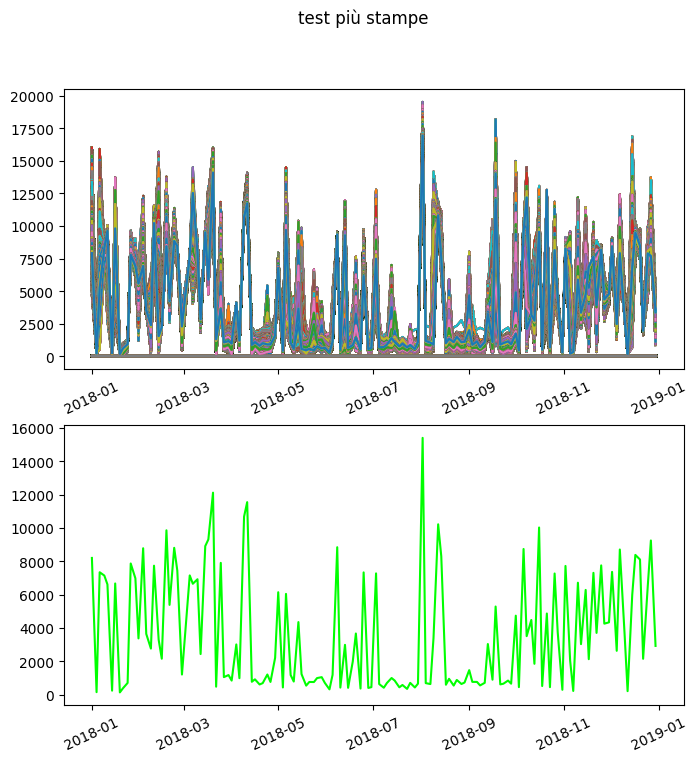

In [30]:
dateB1 = []

for a in dir_list:
    dateB1.append(datetime.strptime(a,"%Y-%m-%d"))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.suptitle('test più stampe')
plt.sca(axs[0])
plt.xticks(rotation=25) # Questo mi serve solo per ruotare le label del tempo
for a in range(band1.shape[0]):
    for b in range(band1.shape[1]):
        axs[0].plot(dateB1,band1[a,b,:])

mean_value = []
for a in range(band1.shape[2]):
    mean_value.append(np.average(band1[:,:,a]))

print(mean_value)
axs[1].plot(dateB1,mean_value,color="lime")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

# Costruzione della curva per la banda 2 

[7855.231267532317, 394.03463084531074, 6757.327134966309, 6584.315813065734, 6060.027053992308, 465.16904768790306, 6570.637135255502, 381.82642644379536, 634.3457879059545, 893.271740073455, 7339.851803117499, 6474.150597183261, 3173.4471066254087, 8365.988172011916, 3493.155672518002, 2718.469287717979, 7191.126825529946, 3334.3941843315306, 2170.294687527112, 8488.576549350762, 5629.327641053819, 8770.454900373059, 6074.152693831516, 1212.5810896787068, 7599.213062841609, 5943.863848000231, 6175.044015153706, 2395.093235778941, 6984.862242979843, 8426.401226177737, 12218.192790421932, 824.0579976286185, 7596.413198762255, 1178.9684924376065, 1351.822247606929, 1133.9965586049336, 2918.7122531015934, 1048.0649960958963, 9496.132392492553, 10205.732395384483, 981.5066225165563, 1058.0100494519795, 796.0519390381445, 905.8062697012638, 1426.5633910755082, 913.594190115388, 2193.4592382659994, 5681.137916076231, 558.2274501865294, 5498.8170710546865, 1205.0763035368286, 946.41623528731

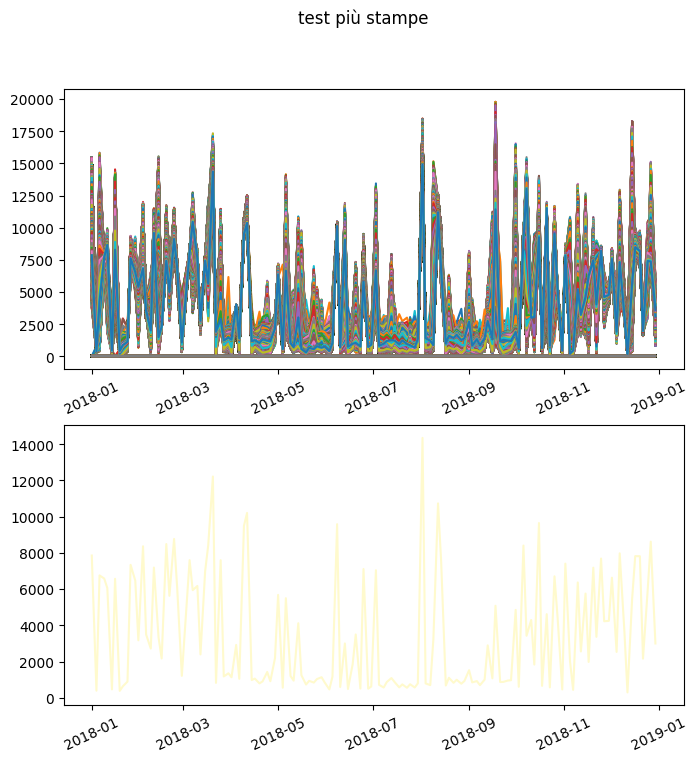

In [31]:
dateB2 = []

for a in dir_list:
    dateB2.append(datetime.strptime(a,"%Y-%m-%d"))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.suptitle('test più stampe')
plt.sca(axs[0])
plt.xticks(rotation=25) # Questo mi serve solo per ruotare le label del tempo
for a in range(band2.shape[0]):
    for b in range(band2.shape[1]):
        axs[0].plot(dateB2,band2[a,b,:])

mean_value = []
for a in range(band2.shape[2]):
    mean_value.append(np.average(band2[:,:,a]))

print(mean_value)
axs[1].plot(dateB2,mean_value,color="lemonchiffon")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

# Costruzione della curva per la banda 3

[7704.373492582203, 671.5716186124527, 6411.761444807542, 6342.282006420081, 5536.0361201885535, 725.07718557506, 6504.999002284623, 655.1413140923682, 954.0980074611758, 1147.407949911796, 6695.729836027647, 5865.591717516411, 3094.1999624049276, 7841.825804679141, 3408.6835217906823, 2630.4438242864167, 6517.687628329333, 3298.4420746695973, 2209.0873507041847, 8295.547225194483, 5662.440975736718, 8546.788918129501, 5686.639578935192, 1359.2947742849706, 7628.205645044681, 5551.757020156742, 5804.602808062697, 2477.395210966193, 6513.776352699615, 7920.708855085457, 11014.691142022615, 1255.1018681858932, 7115.704864223951, 1556.0107290552069, 1774.1483993175048, 1564.542424592961, 2909.4711530119434, 1454.6994129384886, 8537.505292229387, 9460.682784348883, 1353.882616617022, 1444.2470140836924, 1230.2414037421556, 1295.9479886636398, 1751.619393273374, 1338.5375516932243, 2357.4490152983026, 5258.663885595303, 844.7505277769744, 5191.028326440904, 1448.884337314555, 1275.219222649

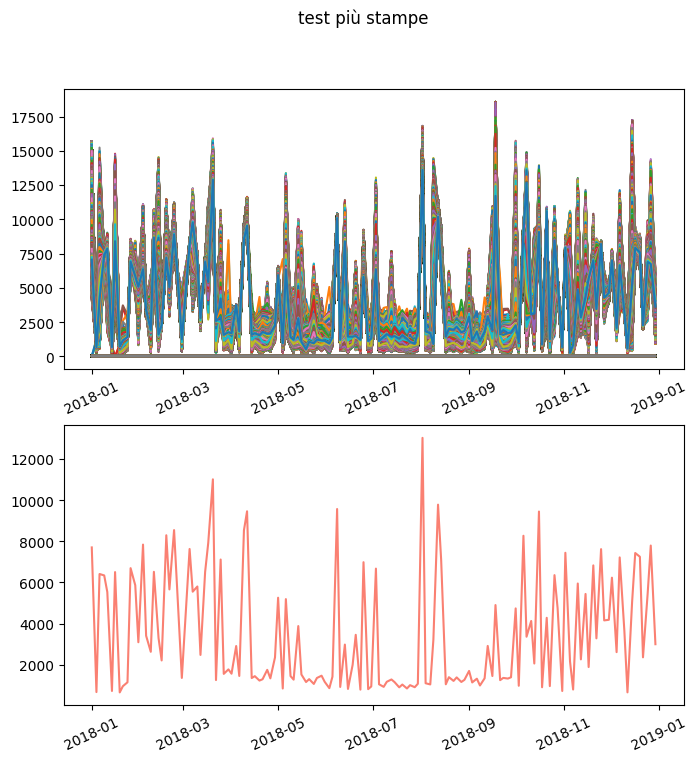

In [32]:
dateB3 = []

for a in dir_list:
    dateB3.append(datetime.strptime(a,"%Y-%m-%d"))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.suptitle('test più stampe')
plt.sca(axs[0])
plt.xticks(rotation=25) # Questo mi serve solo per ruotare le label del tempo
for a in range(band3.shape[0]):
    for b in range(band3.shape[1]):
        axs[0].plot(dateB3,band3[a,b,:])

mean_value = []
for a in range(band3.shape[2]):
    mean_value.append(np.average(band3[:,:,a]))

print(mean_value)
axs[1].plot(dateB3,mean_value,color="salmon")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()